# Tarea 3: K-Means
<hr/>

### Nombre: Benjamín Farías V.

## Librerías

A continuación se importan las librerías necesarias para la tarea:

In [112]:
# Se importan las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Cargar Bases de Datos

Aquí se cargan las bases de datos, con la opción de limitar la cantidad de filas en caso de que sea necesario un testing rápido:

In [113]:
# Se carga la base de datos, con la opción de limitar la cantidad de filas a analizar para una ejecución más rápida
def load_database(path, limit, mode='csv'):
    if mode == 'csv':
        db = pd.read_csv(path, nrows=limit)
    elif mode == 'excel':
        db = pd.read_excel(path, nrows=limit)
    return db

db = load_database('1-Base-de-Datos-Electoral.xlsx', None, 'excel') # Base de datos electoral
coordinates_db = load_database('Comunas_Lat-Long.csv', None, 'csv') # Base de datos de coordenadas
print(list(db)) # Se muestran los nombres de todas las columnas de la base de datos electoral
db.head()

['eleccion', 'vueltae', 'cargo', 'tipocargo', 'fechae', 'anoe', 'periodo', 'fechainicio', 'diainicio', 'mesinicio', 'anoinicio', 'fechatermino', 'diatermino', 'mestermino', 'anotermino', 'numreg', 'nombrereg', 'numprov', 'provincia', 'comuna', 'municipio', 'circunsen', 'distrito', 'circunprov', 'nombrecand1', 'mujer', 'electo', 'segvuelta', 'alcalde', 'lista', 'partido_text', 'siglapart_text', 'pacto_text', 'subpacto_text', 'aux_folio', 'aux_partido', 'aux_pacto', 'aux_subpacto', 'vototot', 'voto_h', 'voto_m', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47']


,eleccion,vueltae,cargo,tipocargo,fechae,anoe,periodo,fechainicio,diainicio,mesinicio,...,vototot,voto_h,voto_m,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
0,Presidenciales,Primera,Presidente,Eleccion Popular,1989-12-14,1989,1990-1994,1990-03-11,11,3,...,962,505.0,457.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Presidenciales,Primera,Presidente,Eleccion Popular,1989-12-14,1989,1990-1994,1990-03-11,11,3,...,369,190.0,179.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Presidenciales,Primera,Presidente,Eleccion Popular,1989-12-14,1989,1990-1994,1990-03-11,11,3,...,203,106.0,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Presidenciales,Primera,Presidente,Eleccion Popular,1989-12-14,1989,1990-1994,1990-03-11,11,3,...,219,117.0,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Presidenciales,Primera,Presidente,Eleccion Popular,1989-12-14,1989,1990-1994,1990-03-11,11,3,...,2660,1358.0,1302.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preprocesamiento

Podemos ver que hay varias columnas 'Unnamed', que se encuentran vacías. Por lo tanto se eliminan del dataset a utilizar:

In [114]:
dataset = db.drop(db.columns[db.columns.str.contains('unnamed', case=False)], axis=1) # Borrar columnas Unnamed
print(list(dataset))
dataset.head()

['eleccion', 'vueltae', 'cargo', 'tipocargo', 'fechae', 'anoe', 'periodo', 'fechainicio', 'diainicio', 'mesinicio', 'anoinicio', 'fechatermino', 'diatermino', 'mestermino', 'anotermino', 'numreg', 'nombrereg', 'numprov', 'provincia', 'comuna', 'municipio', 'circunsen', 'distrito', 'circunprov', 'nombrecand1', 'mujer', 'electo', 'segvuelta', 'alcalde', 'lista', 'partido_text', 'siglapart_text', 'pacto_text', 'subpacto_text', 'aux_folio', 'aux_partido', 'aux_pacto', 'aux_subpacto', 'vototot', 'voto_h', 'voto_m']


,eleccion,vueltae,cargo,tipocargo,fechae,anoe,periodo,fechainicio,diainicio,mesinicio,...,siglapart_text,pacto_text,subpacto_text,aux_folio,aux_partido,aux_pacto,aux_subpacto,vototot,voto_h,voto_m
0,Presidenciales,Primera,Presidente,Eleccion Popular,1989-12-14,1989,1990-1994,1990-03-11,11,3,...,IND,NaN,NaN,IND NA NA,IndFP,IndFP,NaN,962,505.0,457.0
1,Presidenciales,Primera,Presidente,Eleccion Popular,1989-12-14,1989,1990-1994,1990-03-11,11,3,...,IND,NaN,NaN,IND NA NA,IndFP,IndFP,NaN,369,190.0,179.0
2,Presidenciales,Primera,Presidente,Eleccion Popular,1989-12-14,1989,1990-1994,1990-03-11,11,3,...,IND,NaN,NaN,IND NA NA,IndFP,IndFP,NaN,203,106.0,97.0
3,Presidenciales,Primera,Presidente,Eleccion Popular,1989-12-14,1989,1990-1994,1990-03-11,11,3,...,IND,NaN,NaN,IND NA NA,IndFP,IndFP,NaN,219,117.0,102.0
4,Presidenciales,Primera,Presidente,Eleccion Popular,1989-12-14,1989,1990-1994,1990-03-11,11,3,...,IND,NaN,NaN,IND NA NA,IndFP,IndFP,NaN,2660,1358.0,1302.0


A continuación se eliminan la mayoría de columnas del dataset, ya que sólo nos interesa la información sobre los votos realizados por cada comuna en cada tipo de elección, además de los partidos y sus pactos/subpactos (el resto de columnas aluden a las fechas, detalles adicionales, nombres, etc...):

In [115]:
filtered_dataset = dataset.drop(['tipocargo', 'fechae', 'anoe', 'fechainicio', 'diainicio', 'mesinicio', 'anoinicio',
                                 'fechatermino', 'diatermino', 'mestermino', 'anotermino', 'numreg', 'nombrereg',
                                 'numprov', 'provincia', 'municipio', 'circunsen', 'distrito', 'circunprov',
                                 'partido_text', 'voto_h', 'voto_m', 'mujer', 'electo', 'aux_folio', 'lista',
                                 'alcalde', 'segvuelta', 'nombrecand1', 'pacto_text', 'subpacto_text',
                                 'siglapart_text', 'vueltae', 'cargo', 'periodo'], axis=1)
print(list(filtered_dataset))

['eleccion', 'comuna', 'aux_partido', 'aux_pacto', 'aux_subpacto', 'vototot']


Ahora se separan los datos de las elecciones presidenciales, eliminando las columnas del tipo de elección (porque ya no será relevante) y de los subpactos (no aplican en este tipo de elecciones):

In [116]:
presidential = filtered_dataset[filtered_dataset.eleccion == 'Presidenciales']
presidential = presidential.drop(['eleccion', 'aux_subpacto'], axis=1)
presidential.head()

,comuna,aux_partido,aux_pacto,vototot
0,Aisen,IndFP,IndFP,962
1,Algarrobo,IndFP,IndFP,369
2,Alhue,IndFP,IndFP,203
3,Alto Del Carmen,IndFP,IndFP,219
4,Ancud,IndFP,IndFP,2660


También es útil revisar los partidos y sus pactos, permitiendo unir aquellos que sean muy pequeños con otros partidos más grandes que pertenezcan a su mismo pacto:

In [117]:
part_list = presidential['aux_partido'].value_counts().index.tolist() # Lista de partidos
total_historic_votes = presidential['vototot'].sum()

for part in part_list:
    total_votes = presidential[presidential.aux_partido == part]['vototot'].sum()
    pact = presidential[presidential.aux_partido == part].head(1).iloc[0]['aux_pacto']
    print(f'Partido: {part}, Votos: {total_votes / total_historic_votes}%, Pacto: {pact}') # Info de los partidos

Partido: IndFP, Votos: 0.11865773326236166%, Pacto: IndFP
Partido: UDI, Votos: 0.17921951656749288%, Pacto: AlianzaDer
Partido: PS, Votos: 0.19739231912754124%, Pacto: ConcertacionNM
Partido: RN, Votos: 0.17107573464652037%, Pacto: AlianzaDer
Partido: PH, Votos: 0.009943434625953927%, Pacto: Humanista
Partido: DC, Votos: 0.1953977221332469%, Pacto: ConcertacionNM
Partido: PC, Votos: 0.009655835704889102%, Pacto: Izquierda
Partido: PPD, Votos: 0.10363147789035816%, Pacto: ConcertacionNM
Partido: PRI, Votos: 0.0005535227003554489%, Pacto: Regionalista
Partido: Ecol, Votos: 0.002267941356628059%, Pacto: NuevaConst
Partido: PI, Votos: 0.001200682599782791%, Pacto: NuevaConst
Partido: PRO, Votos: 0.010610876474686896%, Pacto: Progresista
Partido: UCC, Votos: 0.0003932029101825534%, Pacto: UnionCentro


Los únicos partidos pequeños que comparten pacto son el 'PI' y el 'Ecol' (los demás partidos son muy grandes, o no comparten pacto con otros). Por lo tanto se juntarán ambos partidos en uno nuevo llamado 'NuevaConst' (NC):

In [118]:
presidential['aux_partido'] = presidential['aux_partido'].replace(to_replace=['PI', 'Ecol'], value='NC')

El siguiente paso consiste en iterar sobre las distintas comunas que votaron en elecciones presidenciales, calculando para cada una de ellas la proporción de votos histórica para cada partido (el porcentaje de votos históricos de cada comuna para cada partido):

In [119]:
communes_list = sorted(presidential['comuna'].value_counts().index.tolist()) # Lista de comunas
part_list = presidential['aux_partido'].value_counts().index.tolist() # Lista de partidos
communes_presidential = {'Commune': communes_list}
for commune in communes_list: # Obtener información para cada comuna
    commune_info = presidential[presidential.comuna == commune]
    total_votes = commune_info['vototot'].sum() # Votos totales históricos
    for part in part_list: # Se obtiene la proporción de votos de cada partido
        votes = commune_info[commune_info.aux_partido == part]['vototot'].sum()
        if part not in communes_presidential:
            communes_presidential[part] = []
        communes_presidential[part].append(votes / total_votes)
presidential_info = pd.DataFrame(communes_presidential)
presidential_info # Información de entrada para el K-Means

,Commune,IndFP,UDI,PS,RN,PH,DC,NC,PC,PPD,PRI,PRO,UCC
0,Aisen,0.114800,0.156676,0.222284,0.184553,0.008291,0.187812,0.001729,0.008014,0.109690,0.000399,0.005409,0.000344
1,Algarrobo,0.108808,0.241715,0.175160,0.248527,0.006536,0.134841,0.003848,0.006278,0.063720,0.000755,0.009371,0.000442
2,Alhue,0.106724,0.157016,0.227072,0.165174,0.009419,0.210630,0.002060,0.008578,0.101341,0.000631,0.010639,0.000715
3,Alto Biobio,0.043029,0.144321,0.327751,0.323474,0.009710,0.123207,0.003831,0.010245,0.000000,0.002673,0.011759,0.000000
4,Alto Del Carmen,0.123182,0.144536,0.233113,0.173913,0.013210,0.190769,0.002188,0.009198,0.099599,0.000972,0.008469,0.000851
5,Alto Hospicio,0.100586,0.120032,0.322767,0.292362,0.014885,0.109439,0.004632,0.010770,0.000000,0.000647,0.023880,0.000000
6,Ancud,0.112659,0.188131,0.189593,0.201486,0.008392,0.182951,0.002395,0.007286,0.098909,0.000439,0.007219,0.000539
7,Andacollo,0.118865,0.144134,0.237825,0.129495,0.006812,0.222712,0.001362,0.010852,0.121463,0.000349,0.005846,0.000285
8,Angol,0.123871,0.206160,0.186408,0.192869,0.007089,0.180875,0.001879,0.006147,0.087813,0.000438,0.005979,0.000473
9,Antartica,0.282700,0.229958,0.069620,0.208861,0.037975,0.082278,0.023207,0.031646,0.033755,0.000000,0.000000,0.000000


Se realizan los mismos pasos para las elecciones parlamentarias:

In [120]:
parliamentary = filtered_dataset[(filtered_dataset.eleccion == 'Parlamentarias-Diputados') 
                                 | (filtered_dataset.eleccion == 'Parlamentarias-Senadores')]
parliamentary = parliamentary.drop(['eleccion', 'aux_subpacto'], axis=1)
parliamentary.head()

,comuna,aux_partido,aux_pacto,vototot
13709,Arica,RN,AlianzaDer,20452
13710,Camarones,RN,AlianzaDer,160
13711,General Lagos,RN,AlianzaDer,207
13712,Putre,RN,AlianzaDer,678
13713,Arica,PAIS,Izquierda,4997


In [121]:
par_part_list = parliamentary['aux_partido'].value_counts().index.tolist()
par_total_historic_votes = parliamentary['vototot'].sum()

for part in par_part_list:
    total_votes = parliamentary[parliamentary.aux_partido == part]['vototot'].sum()
    pact = parliamentary[parliamentary.aux_partido == part].head(1).iloc[0]['aux_pacto']
    print(f'Partido: {part}, Votos: {total_votes / par_total_historic_votes}%, Pacto: {pact}')

Partido: DC, Votos: 0.22680992854780033%, Pacto: ConcertacionNM
Partido: RN, Votos: 0.15285440454890986%, Pacto: AlianzaDer
Partido: UDI, Votos: 0.16502619242001698%, Pacto: AlianzaDer
Partido: PH, Votos: 0.016243955778891973%, Pacto: ConcertacionNM
Partido: PC, Votos: 0.033423537398264896%, Pacto: Izquierda
Partido: IndAlianzaDer, Votos: 0.05910342864275259%, Pacto: AlianzaDer
Partido: PPD, Votos: 0.11957635271355314%, Pacto: ConcertacionNM
Partido: PS, Votos: 0.09412474840617957%, Pacto: ConcertacionNM
Partido: PRSD, Votos: 0.03122315838370417%, Pacto: ConcertacionNM
Partido: IndFP, Votos: 0.012306175759651008%, Pacto: IndFP
Partido: PRI, Votos: 0.005421630973317925%, Pacto: Regionalista
Partido: IndIzq, Votos: 0.005020856488536647%, Pacto: Izquierda
Partido: IndConcertacionNM, Votos: 0.02705328853001916%, Pacto: ConcertacionNM
Partido: IndProgresista, Votos: 0.006758130258733725%, Pacto: Progresista
Partido: UCC, Votos: 0.004947145311294077%, Pacto: AlianzaDer
Partido: IndRegionalis

En este caso existen muchos partidos pequeños que tienen pactos con otros mucho mayores, por lo que se deberán juntar todos estos votos en el partido más representativo de cada pacto:

In [122]:
parliamentary['aux_partido'] = parliamentary['aux_partido'].replace(
    to_replace=['IndAlianzaDer', 'UCC', 'Sur', 'CH1'], value='UDI') # AlianzaDer

parliamentary['aux_partido'] = parliamentary['aux_partido'].replace(
    to_replace=['PH', 'PS', 'PRSD', 'IndConcertacionNM', 'Ecol'], value='DC') # ConcertacionNM

parliamentary['aux_partido'] = parliamentary['aux_partido'].replace(
    to_replace=['IndIzq', 'PAIS', 'NAP', 'MAPU', 'RSD'], value='PC') # Izquierda

parliamentary['aux_partido'] = parliamentary['aux_partido'].replace(
    to_replace=['IndRegionalista', 'ANI', 'MAS', 'PAR'], value='PRI') # Regionalista

parliamentary['aux_partido'] = parliamentary['aux_partido'].replace(
    to_replace=['IndProgresista', 'PLCh'], value='PRO') # Progresista

parliamentary['aux_partido'] = parliamentary['aux_partido'].replace(
    to_replace=['IndLibSoc', 'SCH'], value='Plib') # LibSoc

parliamentary['aux_partido'] = parliamentary['aux_partido'].replace(
    to_replace=['IndNuevaConst'], value='PI') # NuevaConst

parliamentary['aux_partido'] = parliamentary['aux_partido'].replace(
    to_replace=['IndAlianCentro', 'AN', 'DR'], value='AC') # AlianCentro

In [123]:
par_communes_list = sorted(parliamentary['comuna'].value_counts().index.tolist())
par_part_list = parliamentary['aux_partido'].value_counts().index.tolist()
communes_parliamentary = {'Commune': par_communes_list}
for commune in par_communes_list:
    commune_info = parliamentary[parliamentary.comuna == commune]
    total_votes = commune_info['vototot'].sum()
    for part in par_part_list:
        votes = commune_info[commune_info.aux_partido == part]['vototot'].sum()
        if part not in communes_parliamentary:
            communes_parliamentary[part] = []
        communes_parliamentary[part].append(votes / total_votes)
parliamentary_info = pd.DataFrame(communes_parliamentary)
parliamentary_info

,Commune,DC,UDI,PC,RN,PPD,PRI,PRO,IndFP,AC,Plib,PI,PN,IndUCentro,IndSur,IndHumanista,PL
0,Aisen,0.373909,0.163027,0.047062,0.213112,0.146409,0.038447,0.000000,0.010846,0.002706,0.002040,0.000000,0.001744,0.000000,0.000698,0.000000,0.000000
1,Algarrobo,0.279433,0.421047,0.016878,0.116769,0.102873,0.002870,0.012007,0.038306,0.001794,0.004852,0.003172,0.000000,0.000000,0.000000,0.000000,0.000000
2,Alhue,0.389549,0.214552,0.058518,0.132653,0.176927,0.002960,0.003561,0.000000,0.001759,0.008323,0.007594,0.001373,0.002231,0.000000,0.000000,0.000000
3,Alto Biobio,0.507355,0.243829,0.029544,0.083396,0.035153,0.007479,0.029793,0.033159,0.000000,0.000000,0.030292,0.000000,0.000000,0.000000,0.000000,0.000000
4,Alto Del Carmen,0.425386,0.131102,0.029377,0.262164,0.058038,0.049610,0.016338,0.021625,0.000000,0.004850,0.000000,0.000000,0.000000,0.000000,0.001511,0.000000
5,Alto Hospicio,0.275205,0.244608,0.154083,0.084768,0.000000,0.160028,0.041750,0.039557,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Ancud,0.472722,0.241953,0.030562,0.188541,0.037874,0.008909,0.001928,0.009965,0.000000,0.000000,0.007544,0.000000,0.000000,0.000000,0.000000,0.000000
7,Andacollo,0.417793,0.184621,0.059223,0.174871,0.138393,0.005598,0.003660,0.008627,0.007213,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Angol,0.375161,0.118627,0.019330,0.331264,0.101535,0.030716,0.002810,0.001953,0.001419,0.000000,0.000000,0.015019,0.000000,0.002165,0.000000,0.000000
9,Antartica,0.175926,0.498148,0.014815,0.187037,0.014815,0.011111,0.001852,0.090741,0.005556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


También se repiten los pasos para las elecciones municipales:

In [124]:
municipal = filtered_dataset[(filtered_dataset.eleccion == 'Municipales-Concejales') 
                             | (filtered_dataset.eleccion == 'Municipales-Alcaldes')
                             | (filtered_dataset.eleccion == 'Municipales')]
municipal = municipal.drop(['eleccion'], axis=1)
municipal.head()

,comuna,aux_partido,aux_pacto,aux_subpacto,vototot
46179,Arica,DC,ConcertacionNM,NaN,3268
46180,Arica,DC,ConcertacionNM,NaN,13681
46181,Arica,DC,ConcertacionNM,NaN,4194
46182,Arica,PH,ConcertacionNM,NaN,1519
46183,Arica,PPD,ConcertacionNM,NaN,1318


In [125]:
mun_part_list = municipal['aux_partido'].value_counts().index.tolist()
mun_total_historic_votes = municipal['vototot'].sum()

for part in mun_part_list:
    total_votes = municipal[municipal.aux_partido == part]['vototot'].sum()
    pact = municipal[municipal.aux_partido == part].head(1).iloc[0]['aux_pacto']
    print(f'Partido: {part}, Votos: {total_votes / mun_total_historic_votes}%, Pacto: {pact}')

Partido: DC, Votos: 0.20242768660886606%, Pacto: ConcertacionNM
Partido: RN, Votos: 0.14031451336330733%, Pacto: AlianzaDer
Partido: UDI, Votos: 0.1493333917191322%, Pacto: AlianzaDer
Partido: PC, Votos: 0.0411606425185015%, Pacto: Izquierda
Partido: PS, Votos: 0.10449817178558037%, Pacto: ConcertacionNM
Partido: IndAlianzaDer, Votos: 0.07264651206104701%, Pacto: AlianzaDer
Partido: PPD, Votos: 0.08763318040460813%, Pacto: ConcertacionNM
Partido: IndConcertacionNM, Votos: 0.03197449903247906%, Pacto: ConcertacionNM
Partido: PRSD, Votos: 0.044557790402534866%, Pacto: ConcertacionNM
Partido: IndFP, Votos: 0.046032389461307534%, Pacto: IndFP
Partido: IndRegionalista, Votos: 0.0140076090540735%, Pacto: Regionalista
Partido: IndIzq, Votos: 0.012212773102195885%, Pacto: Izquierda
Partido: PRI, Votos: 0.010132651722775377%, Pacto: Regionalista
Partido: PH, Votos: 0.011997499715451063%, Pacto: ConcertacionNM
Partido: UCC, Votos: 0.009846111533981817%, Pacto: UnionCentro
Partido: IndUCentro, Vo

In [126]:
municipal['aux_partido'] = municipal['aux_partido'].replace(
    to_replace=['IndIzq', 'IC'], value='PC') # Izquierda

municipal['aux_partido'] = municipal['aux_partido'].replace(
    to_replace=['IndAlianzaDer', 'PN'], value='UDI') # AlianzaDer

municipal['aux_partido'] = municipal['aux_partido'].replace(
    to_replace=['PPD', 'PRSD', 'IndConcertacionNM', 'PH'], value='DC') # ConcertacionNM

municipal['aux_partido'] = municipal['aux_partido'].replace(
    to_replace=['IndRegionalista', 'PAR'], value='PRI') # Regionalista

municipal['aux_partido'] = municipal['aux_partido'].replace(
    to_replace=['IndProgresista', 'Ecol'], value='PRO') # Progresista

municipal['aux_partido'] = municipal['aux_partido'].replace(
    to_replace=['IndUCentro'], value='UCC') # UnionCentro

municipal['aux_partido'] = municipal['aux_partido'].replace(
    to_replace=['IndHumanista'], value='MAS') # Humanista

municipal['aux_partido'] = municipal['aux_partido'].replace(
    to_replace=['IndNAI'], value='ANI') # Nueva_AI

municipal['aux_partido'] = municipal['aux_partido'].replace(
    to_replace=['IndIgual'], value='PI') # Igualdad

municipal['aux_partido'] = municipal['aux_partido'].replace(
    to_replace=['IndNorte'], value='FN') # Norte

municipal['aux_partido'] = municipal['aux_partido'].replace(
    to_replace=['IndSur'], value='Sur') # Sur

municipal['aux_partido'] = municipal['aux_partido'].replace(
    to_replace=['IndCH1'], value='CH1') # ChilePrimero

In [127]:
mun_communes_list = sorted(municipal['comuna'].value_counts().index.tolist())
mun_part_list = municipal['aux_partido'].value_counts().index.tolist()
communes_municipal = {'Commune': mun_communes_list}
for commune in mun_communes_list:
    commune_info = municipal[municipal.comuna == commune]
    total_votes = commune_info['vototot'].sum()
    for part in mun_part_list:
        votes = commune_info[commune_info.aux_partido == part]['vototot'].sum()
        if part not in communes_municipal:
            communes_municipal[part] = []
        communes_municipal[part].append(votes / total_votes)
municipal_info = pd.DataFrame(communes_municipal)
municipal_info

,Commune,DC,UDI,PC,RN,PS,PRI,IndFP,UCC,PRO,MAS,ANI,PI,FN,Sur,CH1,PL
0,Aisen,0.176582,0.254030,0.045020,0.217836,0.179270,0.065641,0.039326,0.000000,0.005770,0.008256,0.008269,0.000000,0.000000,0.000000,0.000000,0.000000
1,Algarrobo,0.228537,0.275984,0.006557,0.144864,0.001548,0.032072,0.235644,0.073593,0.000000,0.001201,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Alhue,0.320989,0.083046,0.070787,0.077385,0.019708,0.000596,0.410633,0.016856,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Alto Biobio,0.378907,0.276816,0.013792,0.034330,0.017240,0.091298,0.147365,0.000000,0.000000,0.040252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Alto Del Carmen,0.326231,0.303727,0.026255,0.082037,0.093967,0.033796,0.095004,0.003392,0.012050,0.023542,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Alto Hospicio,0.137761,0.386864,0.026614,0.021786,0.202908,0.105481,0.008695,0.000000,0.007187,0.000000,0.000000,0.015338,0.087365,0.000000,0.000000,0.000000
6,Ancud,0.410659,0.284204,0.037157,0.094504,0.080705,0.016458,0.031117,0.021963,0.008072,0.000000,0.015161,0.000000,0.000000,0.000000,0.000000,0.000000
7,Andacollo,0.290448,0.224772,0.078804,0.096536,0.143815,0.024751,0.138161,0.002713,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Angol,0.432856,0.269334,0.024875,0.070457,0.048045,0.010642,0.089146,0.004147,0.040681,0.000248,0.009570,0.000000,0.000000,0.000000,0.000000,0.000000
9,Antofagasta,0.422561,0.152726,0.044534,0.054635,0.061990,0.047673,0.176696,0.010008,0.005954,0.002558,0.000000,0.004346,0.000000,0.000000,0.016010,0.000311


Finalmente se preprocesa la base de datos que contiene la latitud y longitud de cada comuna, para poder utilizar esta información en el análisis de los resultados:

In [133]:
coordinates_db['Comuna'] = coordinates_db['Comuna'].str.lower() # Pasar los nombres a minúscula
coordinates_db['Comuna'] = coordinates_db['Comuna'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8') # Eliminar los tildes
# Estos son los nombres de comunas que venían escritos de forma distinta en las 2 bases de datos
bad_strings = {'aisen': 'aysen', 'cabo de hornos': 'cabo de hornos (ex-navarino)', 'coyhaique': 'coihaique',
               'llay-llay': 'llaillay', 'marchigue': 'marchihue', 'navarino': 'cabo de hornos (ex-navarino)',
               'paihuano': 'paiguano', 'san pedro de atacama': 'san pedro atacama'}

# Función que junta la información de las comunas (según tipo de elección) con sus coordenadas geográficas
def get_commune_data(communes, coords, bad_str):
    communes['Lat'] = []
    communes['Long'] = []
    for commune in communes['Commune']:
        string = commune.lower()
        if not len(coords[coords.Comuna == string]):
            string = bad_str[string]
        coord_data = coords[coords.Comuna == string]
        communes['Lat'].append(coord_data.iloc[0]['Latitude'])
        communes['Long'].append(coord_data.iloc[0]['Longitude'])
    return pd.DataFrame(communes)

# Datos según tipo de elección y comuna
presidential_data = get_commune_data(communes_presidential, coordinates_db, bad_strings)
parliamentary_data = get_commune_data(communes_parliamentary, coordinates_db, bad_strings)
municipal_data = get_commune_data(communes_municipal, coordinates_db, bad_strings)
presidential_data.head()

,Commune,IndFP,UDI,PS,RN,PH,DC,NC,PC,PPD,PRI,PRO,UCC,Lat,Long
0,Aisen,0.114800,0.156676,0.222284,0.184553,0.008291,0.187812,0.001729,0.008014,0.109690,0.000399,0.005409,0.000344,-46.363887,-74.808328
1,Algarrobo,0.108808,0.241715,0.175160,0.248527,0.006536,0.134841,0.003848,0.006278,0.063720,0.000755,0.009371,0.000442,-33.370136,-71.691067
2,Alhue,0.106724,0.157016,0.227072,0.165174,0.009419,0.210630,0.002060,0.008578,0.101341,0.000631,0.010639,0.000715,-34.074559,-71.205891
3,Alto Biobio,0.043029,0.144321,0.327751,0.323474,0.009710,0.123207,0.003831,0.010245,0.000000,0.002673,0.011759,0.000000,-37.674305,-71.977584
4,Alto Del Carmen,0.123182,0.144536,0.233113,0.173913,0.013210,0.190769,0.002188,0.009198,0.099599,0.000972,0.008469,0.000851,-28.759447,-70.486666


## Algoritmo

A continuación se encuentra el código del algoritmo K-Means, que será utilizado en el apartado de análisis para poder encontrar clusters de comunas según su afinidad política. Los parámetros que recibe la función `k_means()` son los siguientes:

- data: Corresponde al dataset que contiene los vectores a utilizar para representar la afinidad política de cada comuna (numpy Array).
- k: El valor de K (cantidad de centroides).
- max_iter: Cantidad máxima de iteraciones del algoritmo.
- tolerance: Tolerancia al error al final de cada iteración (define en qué momento se puede asumir que los datos convergieron).

In [134]:
# Genera los k centroides para un dataset dado
def generate_centroids(data, k):
    min_values = np.min(data,axis=0)
    max_values = np.max(data,axis=0)
    range_values = list(zip(min_values, max_values))
    centroids = []
    for cluster in range(k): # Se generan aleatoriamente (distribución uniforme)
        centroids.append([np.random.uniform(n[0], n[1]) for n in range_values])
    return np.array(centroids)

# Obtiene el índice del centroide más cercano a un punto
def get_closest_cluster(point, centroids):
    distances = [np.linalg.norm(point - centroid, axis=0) for centroid in centroids] # Se calcula la distancia euclidiana
    return np.argmin(distances) # Se obtiene el mínimo de las distancias

# Función que aplica el algoritmo K-Means sobre un dataset
def k_means(data, k=8, max_iter=300, tolerance=0.0001):
    centroids = generate_centroids(data, k) # Se generan los k centroides iniciales
    clusters = np.zeros(len(data)) # Contiene los índices de los clusters asociados a cada dato
    iterations = 0 # Contador de iteraciones
    error = float('inf') # Error inicial (infinito)
    while (error > tolerance) and (iterations < max_iter): # Se itera mientras NO se supere el máximo de iteraciones
        for row in range(len(data)):                       # ni haya convergencia
            closest_cluster = get_closest_cluster(data[row], centroids)
            clusters[row] = closest_cluster # Se asignan los nuevos clusters a cada dato
        new_centroids = []
        for cluster in range(k): # Se actualizan los centroides
            points = [data[index] for index in range(len(data)) if clusters[index] == cluster]
            if points: # Si el cluster no es vacío, se actualiza usando la media entre sus puntos
                new_centroid = np.mean(points, axis=0)
            else: # Si el cluster es vacío, se actualiza generando uno nuevo de forma aleatoria
                new_centroid = generate_centroids(data, 1)[0]
            new_centroids.append(new_centroid)
        new_centroids = np.array(new_centroids)
        error = np.linalg.norm(centroids - new_centroids) # Se calcula el error de convergencia
        centroids = new_centroids
        iterations += 1
    return clusters, centroids

## Aplicación, Análisis y Visualización

A continuación se aplicará el algoritmo sobre los datos de los 3 tipos de elecciones, probando con distintos valores de K. Es importante notar que debido a la generación aleatoria de los centroides iniciales, en algunos casos será necesario ejecutar el algoritmo múltiples veces hasta obtener un resultado representativo (los mapas presentes en este Jupyter Notebook no necesariamente se obtendrán al ejecutar el algoritmo 1 sola vez).

Primero se define una función para graficar los resultados y visualizarlos:

In [160]:
# Grafica los clusters obtenidos en un mapa geográfico de Chile
def plot_clusters(lat, long, clusters):
    # Colores posibles (el K utilizado debe ser a lo más igual al largo de esta lista, para una correcta visualización)
    colors = ['red', 'blue', 'green', 'purple', 'yellow', 'orange', 'black']
    plt.figure(figsize=(12,8))
    plt.scatter(long, lat, c=[colors[int(cluster)] for cluster in clusters], alpha=0.5)
    plt.show()

Se aplica el algoritmo sobre los datos de las elecciones presidenciales:

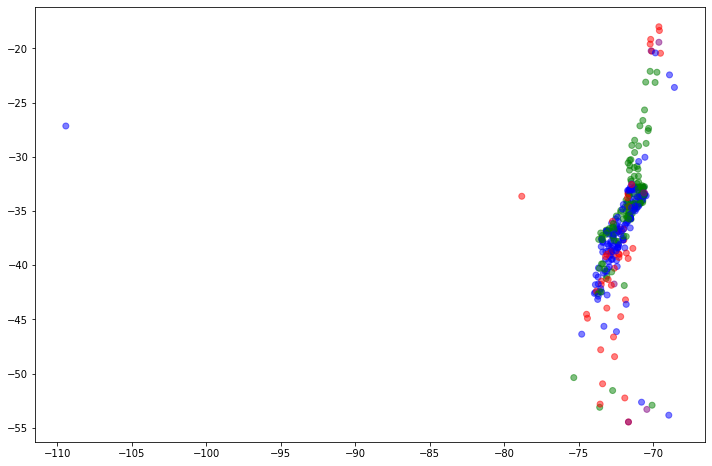

In [141]:
presidential_array = presidential_data.drop(['Commune', 'Lat', 'Long'], axis=1).to_numpy()
p_k1 = 4
presidential_clusters, presidential_centroids = k_means(presidential_array, k=p_k1)
plot_clusters(list(presidential_data['Lat']), list(presidential_data['Long']), presidential_clusters)

Utilizando K = 4, se observan 3 clusters de comunas predominantes, los que abarcan los siguientes puntos geográficos de Chile:

- C1: Las comunas de más al Norte (por ejemplo Iquique), y luego una cantidad considerable de comunas a partir de la región Metropolitana, hasta llegar a la Zona Austral.

- C2: Las comunas que se encuentran principalmente desde la región de Atacama hasta la región Metropolitana, con una cantidad considerable de comunas llegando más hacia el Sur.

- C3: Una gran cantidad de comunas desde la región Metropolitana hasta la región de Los Lagos, con algunas otras comunas en la Zona Norte y en la Zona Austral.

El último cluster tiene muy pocas comunas, por lo que se volverá a analizar el mapa utilizando sólo 3 clusters:

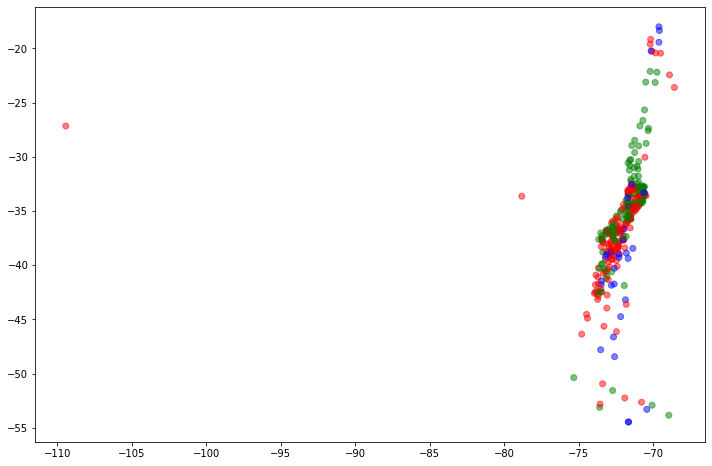

In [156]:
p_k2 = 3
presidential_clusters, presidential_centroids = k_means(presidential_array, k=p_k2)
plot_clusters(list(presidential_data['Lat']), list(presidential_data['Long']), presidential_clusters)

Utilizando K = 3, se obtienen los mismos clusters mencionados anteriormente, excluyendo al que tenía pocas comunas. Estos 3 clusters podrían representar preferencias por partidos políticos izquierdistas, derechistas y de centro. Aun así, esto no se puede deducir directamente de los resultados, puesto que existen partidos que son mucho más populares que otros, además de comunas que pueden ser similares a otras en ciertos aspectos, pero muy distintas en otros. El algoritmo no es capaz de considerar ninguna de estas características, y actúa mas bien como una caja negra que intenta agrupar comunas.

Ahora se aplica el algoritmo sobre los datos de las elecciones parlamentarias:

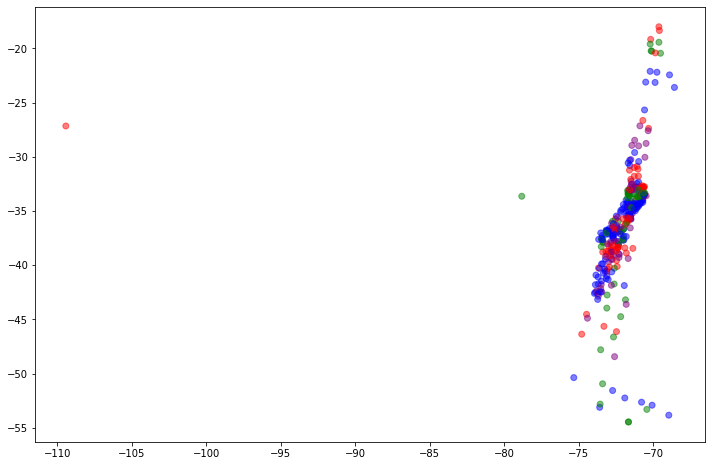

In [172]:
parliamentary_array = parliamentary_data.drop(['Commune', 'Lat', 'Long'], axis=1).to_numpy()
par_k1 = 4
parliamentary_clusters, parliamentary_centroids = k_means(parliamentary_array, k=par_k1)
plot_clusters(list(parliamentary_data['Lat']), list(parliamentary_data['Long']), parliamentary_clusters)

Utilizando K = 4, se obtienen clusters similares a los presidenciales, pero en este caso el último cluster sí tiene una cantidad considerable de comunas. Esto probablemente se debe a que existe una cantidad bastante mayor de datos de elecciones parlamentarias que de elecciones presidenciales, permitiendo una mejor formación de los clusters. A continuación se aprovecha esto para aplicar el algoritmo usando K = 2, obteniendo una visualización de la política en Chile, vista desde 2 ángulos (colores azul y rojo):

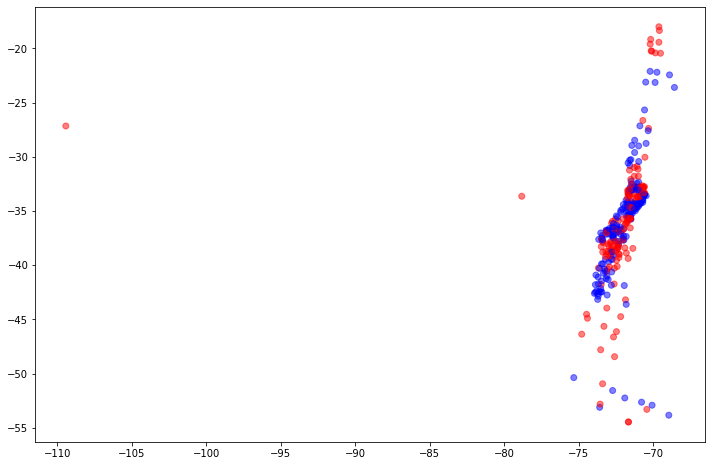

In [173]:
par_k2 = 2
parliamentary_clusters, parliamentary_centroids = k_means(parliamentary_array, k=par_k2)
plot_clusters(list(parliamentary_data['Lat']), list(parliamentary_data['Long']), parliamentary_clusters)

Estos 2 colores podrían representar las comunas que tienen preferencias más izquierdistas vs derechistas, aunque claramente las comunas están determinadas por vectores de preferencia mucho más complejos que sólo esas 2 vertientes políticas, además de que faltaría considerar el centro político.

Finalmente se aplica el algoritmo sobre los datos de las elecciones municipales:

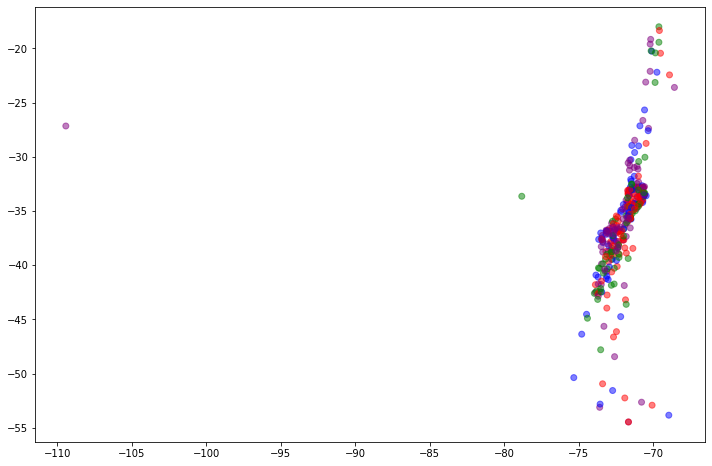

In [178]:
municipal_array = municipal_data.drop(['Commune', 'Lat', 'Long'], axis=1).to_numpy()
m_k1 = 4
municipal_clusters, municipal_centroids = k_means(municipal_array, k=m_k1)
plot_clusters(list(municipal_data['Lat']), list(municipal_data['Long']), municipal_clusters)

Utilizando K = 4, se obtienen 4 clusters que no indican una relación con su ubicación geográfica. Esto puede deberse a que, al tener una mayor cantidad de datos sobre elecciones municipales, es necesario realizar una mayor separación entre los grupos de comunas para poder identificar clusters más relevantes:

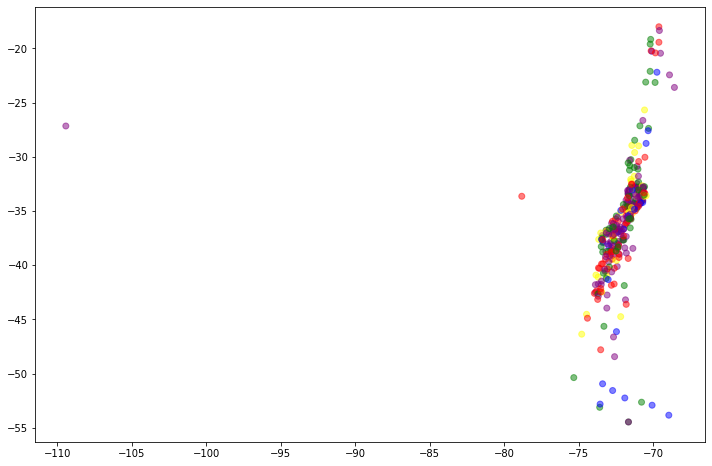

In [182]:
m_k2 = 5 # Se aumenta el K para separar más los clusters
municipal_clusters, municipal_centroids = k_means(municipal_array, k=m_k2)
plot_clusters(list(municipal_data['Lat']), list(municipal_data['Long']), municipal_clusters)

Al aumentar el K a 5, se puede observar una mayor relación entre los clusters y las zonas geográficas, aunque aún sigue habiendo ruido en algunos lugares del mapa. Algo que se puede notar de forma clara en este último mapa, es que en la Zona Central de Chile existe un 'choque' de ideas políticas que no está presente en las Zonas Norte y Sur. Esto se debe a que en el centro de Chile se concentra una gran parte de la población total del país, por lo que se da el espacio para una mayor variedad de ideologías políticas.

Como conclusión, el algoritmo K-Means es una buena y simple herramienta que permite generar clusters sin tomar mucho tiempo ni ocupar muchos recursos, a diferencia de otros métodos, por ejemplo los de aprendizaje supervisado, que requieren ser entrenados previamente a la clasificación. Aun así, el algoritmo sólo se encarga de agrupar los datos en distintos grupos (cuya cantidad está dada por el valor de K), por lo que la interpretación de estos resultados queda muy a criterio de la persona y a veces puede representar un desafío el obtener información concreta de ello. 